In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('/content/drive/MyDrive/UFSC/Trabalhos/weather.csv', usecols= ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'])
dados_filtrados = data[data['Location'] == 'Albury']
dados_filtrados = dados_filtrados.drop(columns=['Location'], axis=1)
dados_filtrados = dados_filtrados.dropna(how='any')

In [3]:
dados_filtrados.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


Regiões: Albury, Cobar, NorfolkIsland, Newcastle e CoffsHarbour.

In [4]:
from scipy import stats
z = np.abs(stats.zscore(dados_filtrados._get_numeric_data()))
dados_filtrados = dados_filtrados[(z < 3).all(axis=1)]
print(dados_filtrados.shape)

(2333, 17)


In [5]:
dados_filtrados['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
dados_filtrados['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

<ipython-input-5-4c3ad8de67d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
<ipython-input-5-4c3ad8de67d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_filtrados['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [6]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(dados_filtrados[col]))

dados_filtrados = pd.get_dummies(dados_filtrados, columns=categorical_columns)
dados_filtrados.iloc[4:9]

['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,0,1,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,0,1,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,0,1,0,0,0,0,0
9,13.1,30.1,1.4,28.0,15.0,11.0,58.0,27.0,1007.0,1005.7,...,0,0,1,0,0,0,0,0,0,0


In [7]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(dados_filtrados)
dados_filtrados = pd.DataFrame(scaler.transform(dados_filtrados), index=dados_filtrados.index, columns=dados_filtrados.columns)
dados_filtrados.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
4,0.685811,0.671053,0.045455,0.476190,0.192308,0.545455,0.766234,0.279570,0.348894,0.281407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.587838,0.602632,0.009091,0.714286,0.653846,0.666667,0.415584,0.172043,0.309582,0.266332,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.577703,0.478947,0.000000,0.619048,0.692308,0.666667,0.337662,0.129032,0.319410,0.336683,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.354730,0.523684,0.000000,0.380952,0.153846,0.454545,0.324675,0.129032,0.412776,0.384422,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.537162,0.613158,0.063636,0.269841,0.500000,0.272727,0.454545,0.215054,0.255528,0.273869,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.547297,0.621053,0.000000,0.301587,0.576923,0.121212,0.324675,0.161290,0.373464,0.349246,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [8]:
from sklearn.feature_selection import SelectKBest, chi2
X = dados_filtrados.loc[:,dados_filtrados.columns!='RainTomorrow']
y = dados_filtrados[['RainTomorrow']]
selector = SelectKBest(chi2, k=3)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Humidity3pm', 'RainToday'], dtype='object')


In [9]:
dados_filtrados = dados_filtrados[['Humidity3pm','Rainfall','RainToday','RainTomorrow']]
X = dados_filtrados[['Humidity3pm']]
y = dados_filtrados[['RainTomorrow']]

In [10]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

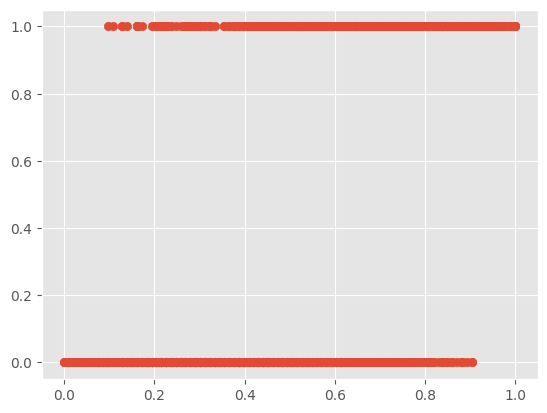

In [11]:
plt.scatter(X.values,y.values)
plt.show()
X = np.array([[0.1,0.3],
              [0.5,0.6]])
kmeans = KMeans(n_clusters=2)

In [ ]:
kmeans.fit(X)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)
colors = [("g.","r.","c.","y.")]

[[0.5 0.6]
 [0.1 0.3]]
[1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
